In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import itertools
import collections

In [11]:
with open("test2.pkl", "rb") as f:
  wow_graph_new = pickle.load(f)

In [17]:
with open("test.pkl", "rb") as f:
  wow_graph_old = pickle.load(f)

In [29]:
def draw_graph(g, bbl, with_labels=False):
  mapping = {'bizaddr': 'blue', 'name': 'red'}
  min_size = 10
  kwargs = {
      'node_size':  [len(n[1]['bbls']) + min_size for n in g.nodes(data=True)],
      'edge_color': [mapping[x] for x in nx.get_edge_attributes(g, "type").values()],
      'alpha': 0.6,
      'node_color': ['gold' if bbl in n[1]['bbls'] else 'black' for n in g.nodes(data=True)],
      # 'cmap': plt.cm.winter_r
    }
  nx.draw_networkx(g, with_labels=with_labels, **kwargs)
  plt.axis("off")
  plt.show()

In [3]:
def get_bbl_subgraph(g, bbl):
    for c in nx.connected_components(g):
        induced_subgraph = g.subgraph(c)
        for node in induced_subgraph.nodes(data=True):
            if bbl in node[1]["bbls"]:
                return induced_subgraph

In [27]:
def draw_wow_graph_for_bbl(wow_graph, bbl):
  g = get_bbl_subgraph(wow_graph, bbl)
  nested_bbls = [n[1]["bbls"] for n in g.nodes(data=True)]
  bbls = list(itertools.chain.from_iterable(nested_bbls))
  print("bbls: ", len(set(bbls)))
  print("dup bbls: ", len(bbls) - len(set(bbls)))
  draw_graph(g, bbl)

In [21]:
g = get_bbl_subgraph(wow_graph_old, '2042900008')
nested_bbls = [n[1]["bbls"] for n in g.nodes(data=True)]
bbls_old = list(itertools.chain.from_iterable(nested_bbls))

g = get_bbl_subgraph(wow_graph_new, '2042900008')
nested_bbls = [n[1]["bbls"] for n in g.nodes(data=True)]
bbls_new = list(itertools.chain.from_iterable(nested_bbls))

print("new not in old")
print([x for x in set(bbls_new) if x not in set(bbls_old)])
print("old not in new")
print([x for x in set(bbls_old) if x not in set(bbls_new)])

new not in old
[]
old not in new
['1001420025']


bbls:  77
dup bbls:  25


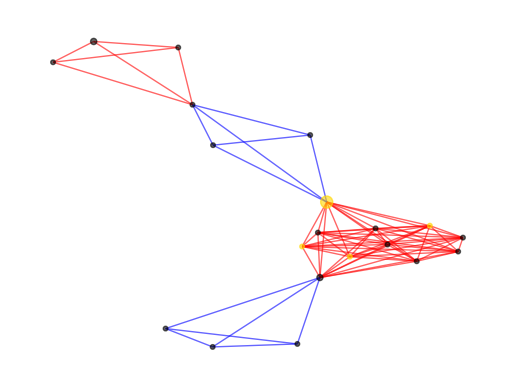

In [30]:
draw_wow_graph_for_bbl(wow_graph_old, '1001420025')

bbls:  171
dup bbls:  0


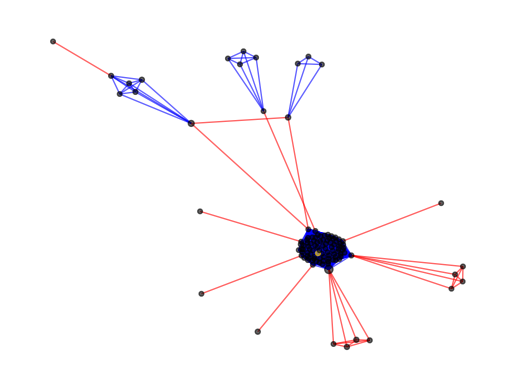

In [33]:
draw_wow_graph_for_bbl(wow_graph_new, '1001420025')

bbls:  77
dup bbls:  25


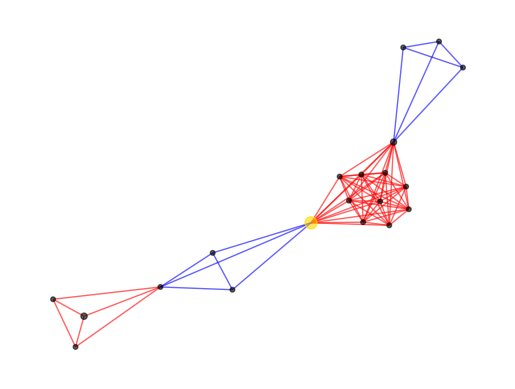

In [34]:
draw_wow_graph_for_bbl(wow_graph_old, '2042900008')

bbls:  76
dup bbls:  0


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


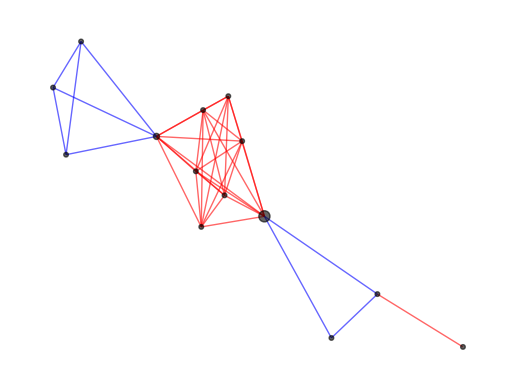

In [6]:
draw_wow_graph_for_bbl('2042900008')

bbls:  145


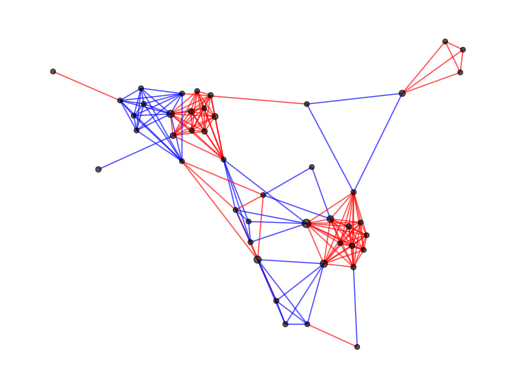

In [112]:
draw_wow_graph_for_bbl('3019250007')

bbls:  11


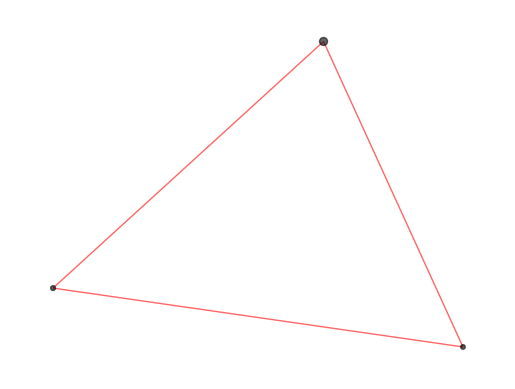

In [113]:
draw_wow_graph_for_bbl('3005650001')

bbls:  174


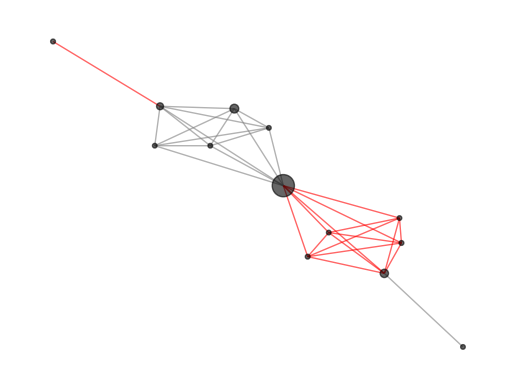

In [104]:
draw_wow_graph_for_bbl('4015640058')

bbls:  218


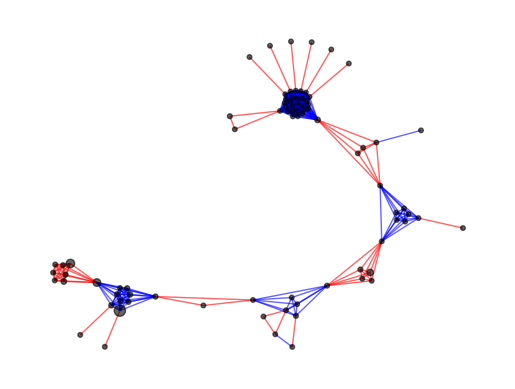

In [12]:
draw_wow_graph_for_bbl('1004120042')

bbls:  6445


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


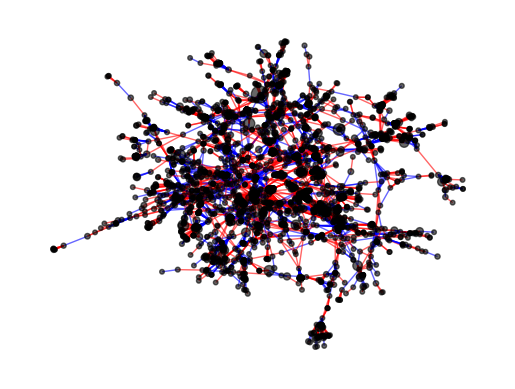

In [13]:
draw_wow_graph_for_bbl('3013420039')